# **Fourier Neural Operator : Let's see the data !**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install pymatreader

In [ ]:
from pymatreader import read_mat
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from time import sleep
from IPython.display import clear_output
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation

##Burgers equation
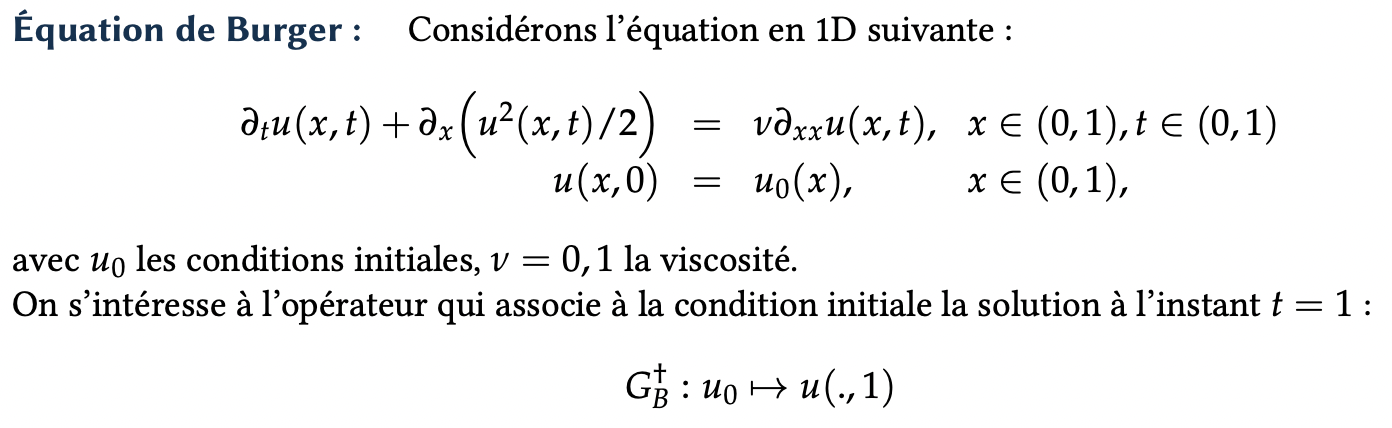

Download dataset for Burgers equation




In [ ]:
!unzip /content/drive/MyDrive/stanford_intership/Burgers_v100.zip

In [ ]:
data_burger = read_mat('burgers_v100_t100_r1024_N2048.mat')
keys_burger = []
for cle, valeur in data_burger.items():
        print(cle)
        keys_burger.append(cle)

/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio.py:218: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


__header__
__version__
__globals__
input
output
sigma
steps
tau
tspan
None
u0eval
visc
__function_workspace__


/usr/local/lib/python3.7/dist-packages/pymatreader/utils.py:213: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


In [ ]:
N_burger, t_max_burger, r_burger = data_burger['output'].shape

This code shows the evolution of the solution of 1D Burgers equation for the inition condition indexed by interest_burger


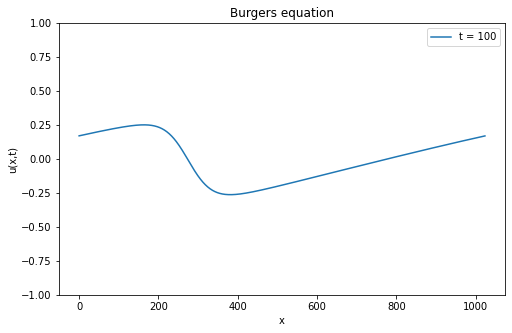

In [ ]:
interest_burger = 1000
for t in range(t_max_burger):
    fig = plt.figure(figsize=(8,5))
    plt.ylim(-1,1)
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    plt.title("Burgers equation")
    plt.plot(data_burger['output'][interest_burger,t,:],label = 't = '+ str(t))
    plt.legend()
    plt.show()
    clear_output(wait=True)

## Darcy equation
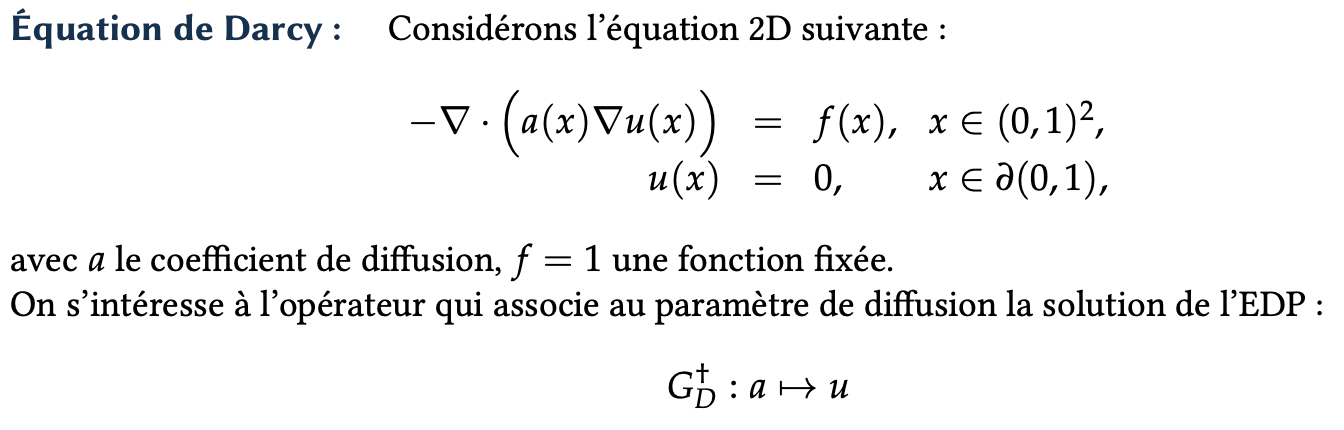

Download dataset for Darcy's equation.

In [ ]:
!unzip /content/drive/MyDrive/stanford_intership/Darcy_241.zip

n
Archive:  /content/drive/MyDrive/stanford_intership/Darcy_241.zip
n
  inflating: piececonst_r241_N1024_smooth2.mat  
  inflating: piececonst_r241_N1024_smooth1.mat  


In [ ]:
data_darcy = read_mat('piececonst_r241_N1024_smooth1.mat')
keys_darcy = []
for cle, valeur in data_darcy.items():
        print(cle)
        keys_darcy.append(cle)

__header__
__version__
__globals__
Kcoeff
Kcoeff_x
Kcoeff_y
coeff
sol


This code shows the evolution of the solution of 1D Burgers equation for the inition condition indexed by interest

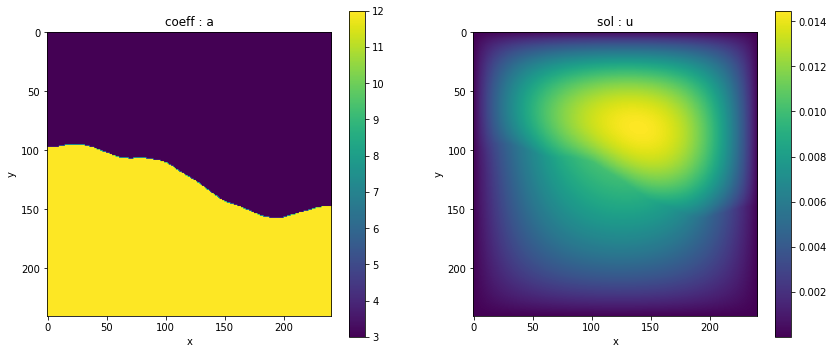

In [ ]:
interest_darcy = 1000

fig = plt.figure(figsize =(14,6))

# Coefficient a
ax1 = plt.subplot(121)
plt.imshow(data_darcy[keys_darcy[6]][interest_darcy])
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.title(keys_darcy[6] + ' : a')

# Solution u
ax1 = plt.subplot(122)
plt.imshow(data_darcy[keys_darcy[7]][interest_darcy])
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.title(keys_darcy[7] + ' : u')

plt.show()

##Navier-Stockes equation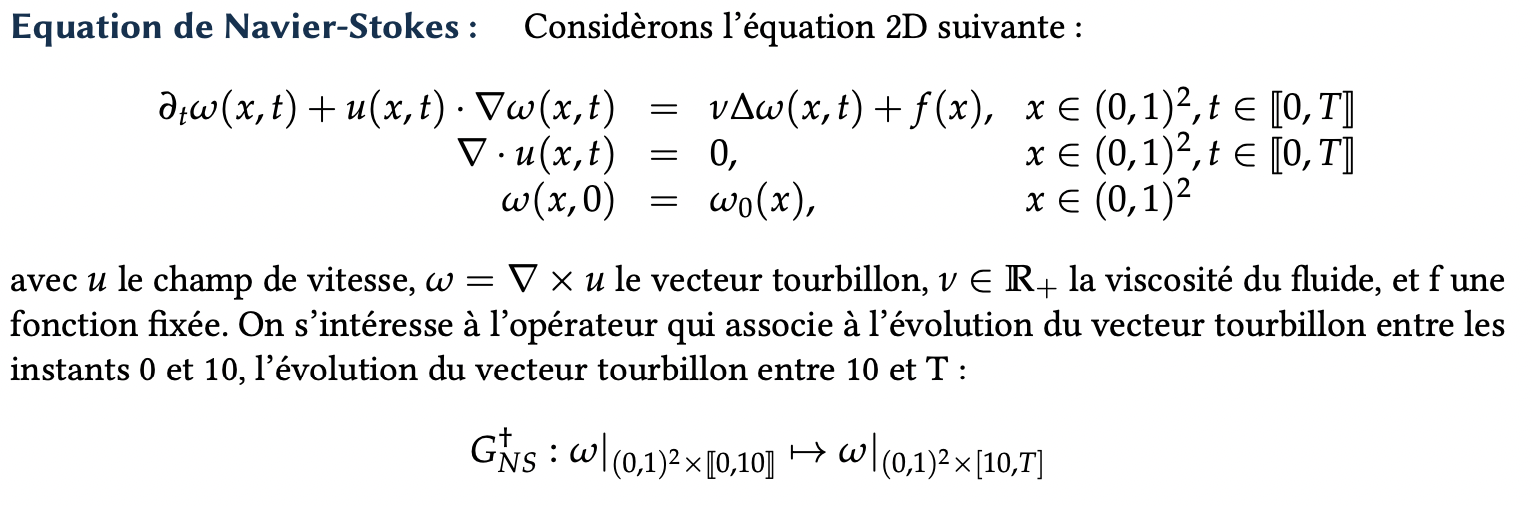

Download dataset for Navier-stockes equation

In [ ]:
!unzip /content/drive/MyDrive/stanford_intership/NavierStokes_V1e-4_N20_T50_R256_test.zip

Archive:  /content/drive/MyDrive/stanford_intership/NavierStokes_V1e-4_N20_T50_R256_test.zip
  inflating: ns_data_V1e-4_N20_T50_R256test.mat  


In [ ]:
data_navier_stockes = read_mat('ns_data_V1e-4_N20_T50_R256test.mat')
keys_navier_stockes = []
for cle, valeur in data_navier_stockes.items():
        print(cle)
        keys_navier_stockes.append(cle)

__header__
__version__
__globals__
a
u
t


This code allows us to understand the link between a et u

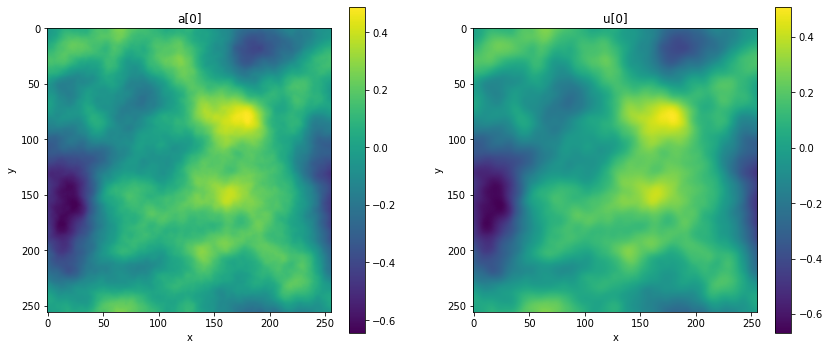

In [ ]:
fig = plt.figure(figsize =(14,6))

# Initial condition a
ax1 = plt.subplot(121)
plt.imshow(data_navier_stockes['a'][0])
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.title('a[0]')

# Solution u
ax1 = plt.subplot(122)
plt.imshow(data_navier_stockes['u'][0,:,:,0])
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.title('u[0]')

plt.show()

In [ ]:
w = data_navier_stockes['u']            # vorticity
time = data_navier_stockes['t']         

This code shows the evolution of the solution of 2D Navier-Stockes equation for the inition condition indexed by interest_navier_stockes

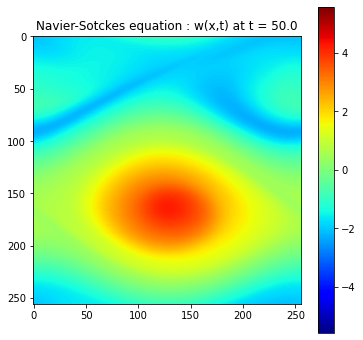

In [ ]:
interest_navier_stockes = 2

mima = np.max((np.abs(w[interest_navier_stockes,:,:,:].min()), np.abs(w[interest_navier_stockes,:,:,:].max())))
norm = mcolors.Normalize(-mima, +mima)
for t in range(len(time)):
    fig = plt.figure(figsize=(7,7))
    plt.title("Navier-Sotckes equation : w(x,t) at t = "+ str(time[t]))
    ims = plt.imshow(w[0,:,:,t], cmap = 'jet', norm=norm)
    plt.colorbar(ims)
    plt.show()
    clear_output(wait=True)

# Bonus

For animation, this code is better regarding quality and time of execution. However, I don't know how to see the animation in the notebook.

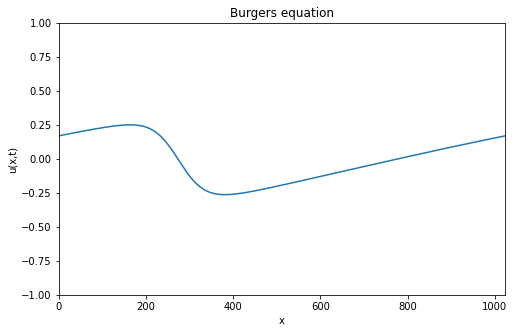

In [ ]:
# Set up empty Figure, Axes and Line objects
fig, ax = plt.subplots(figsize=(8,5))
# Set axes limits so that the whole image is included
ax.set(xlim=(0, 1024), ylim=(-1, 1))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
plt.title("Burgers equation")
# Draw a blank line
line, = ax.plot([], []) 
# Define data - one sine wave
x = np.arange(r_burger)
y = data_burger['output'][interest_burger,:,:]

# Define animate function
def animate(t):
    line.set_data(x, y[t])
    return line,

# Pass to FuncAnimation
anim = FuncAnimation(fig, animate, frames=t_max, interval=30, blit=True)

# Save in the current working directory
anim.save('burger_example.mp4')

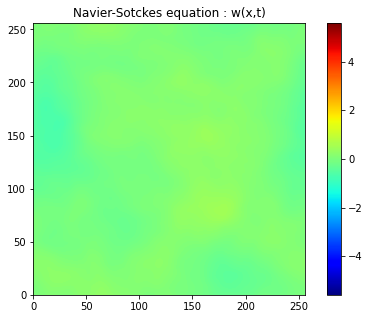

In [ ]:
mima = np.max((np.abs(w[interest_navier_stockes,:,:,:].min()), np.abs(w[interest_navier_stockes,:,:,:].max())))
norm = mcolors.Normalize(-mima, +mima)

# Set up empty Figure, Axes and Line objects
fig, ax = plt.subplots(figsize=(7,7))

# Set axes limits so that the whole image is included
ax.set(xlim=(0, 256), ylim=(0, 256))
plt.title("Navier-Sotckes equation : w(x,t)")    
plt.colorbar(ims)

# Define animate function
def animate(t):
    return [plt.imshow(w[0,:,:,t], cmap = 'jet', norm=norm)]

# Pass to FuncAnimation
anim = FuncAnimation(fig, animate, frames=len(time), interval=200, blit=True, repeat = True, repeat_delay=0)

# !!!Takes about 5 min to run!!!
# Save in the current working directory 
#anim.save('navier_stockes_example.mp4')